# Part II - Communicate Data Findings Project
## by Azubuike Godswill

## Investigation Overview

### Key Insights

* Subscribers had the highest total distance covered (84% of the total distance)

* Most riders were between the ages of 25-35 years.

* Male riders covered more distance than other genders. (72%)

* Most trips started on Tuesday and in the month of October in the afternoon.

* Mean speed of riders was approximately 10km/hr.

* The elderly (70 -140 years)  took longer time to complete their journey.




## Dataset Overview
### Dataset: Ford Gobike System Data

Source: Amazon AWS

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('cleaned-fordgobike-dataset.csv')

In [3]:
# function to add percentage labels to plot
def perc(type_counts , sum_value):
    for i in range(type_counts.shape[0]):
        count = type_counts[i]
        perct_str = '{:0.1f}'.format(count*100/ sum_value)
        plt.text(i, count +700, perct_str + '%', ha = 'center')
        sb.despine(left=True)
        plt.yticks(())
        plt.ylabel('');


## Subscribers had the highest total distance covered (84% of the total distance)


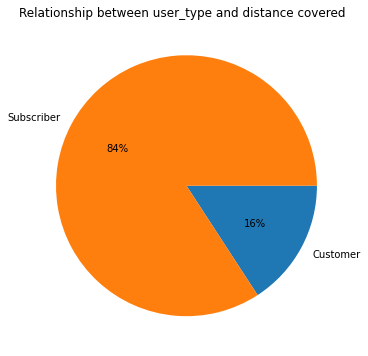

In [4]:
group_user = bike.groupby('user_type')[['duration_sec', 'dist']].sum()
group_user['dist'].plot(kind ='pie',autopct='%.0f%%', counterclock =False, figsize=(12,6))
plt.ylabel('');
plt.title('Relationship between user_type and distance covered  ')
plt.show()

## Most riders were between the ages of 25-35 years.


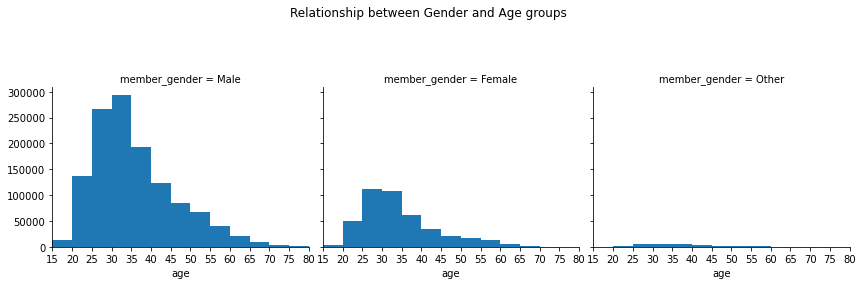

In [5]:
bins = np.arange(15,150 +5, 5)
g = sb.FacetGrid(data = bike , col = 'member_gender' ,height = 4, aspect =1)
g.map(plt.hist, 'age' ,bins = bins)
g.set(xlim = (15,80) , xticks = np.arange(15, 80 +5,5))
g.fig.subplots_adjust(top=0.7)
g.fig.suptitle('Relationship between Gender and Age groups')
plt.show()

## Male riders covered more distance than other genders (72% of total distance)



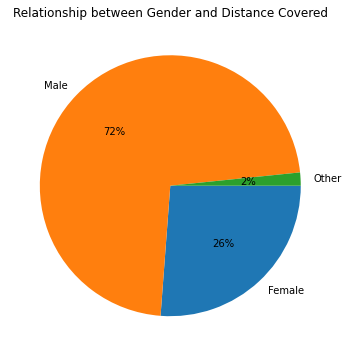

In [6]:
group_gender = bike.groupby('member_gender')[['duration_sec', 'dist']].sum()

group_gender['dist'].plot(kind ='pie',autopct='%.0f%%', counterclock =False , figsize=(12,6))
plt.ylabel('')
plt.title('Relationship between Gender and Distance Covered')
plt.show()

## Most trips started on Tuesday and in the month of October in the afternoon.

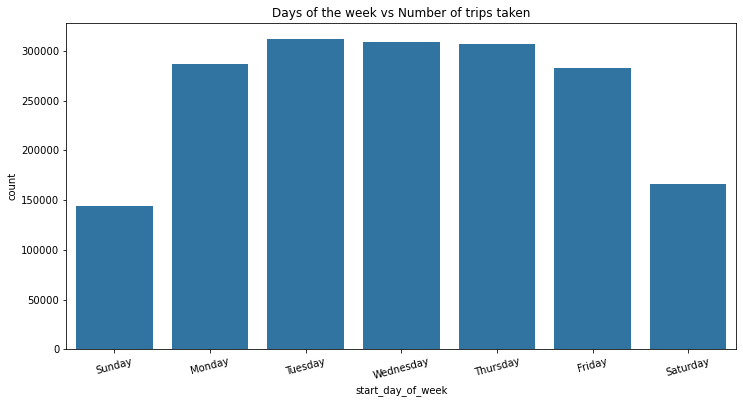

In [7]:
days_ = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']
day_cat = pd.api.types.CategoricalDtype(categories = days_ , ordered = True)

bike['start_day_of_week']  = bike['start_day_of_week'].astype(day_cat)

week_counts = bike['start_day_of_week'].value_counts()
sum_week = week_counts.sum()
# plot
plt.figure(figsize = (12,6))
color = sb.color_palette()[0]
sb.countplot(x= bike.start_day_of_week , color = color)
plt.title('Days of the week vs Number of trips taken')
plt.xticks(rotation = 15)
plt.show()

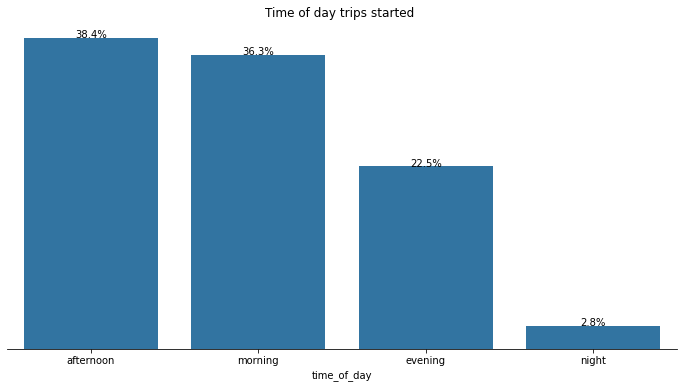

In [8]:
order_counts  = bike['time_of_day'].value_counts()
sum_counts = order_counts.sum()
order = order_counts.index
plt.figure(figsize = (12,6))
sb.countplot(x = bike.time_of_day, color = color , order = order);
plt.title('Time of day trips started ')
perc(order_counts, sum_counts)

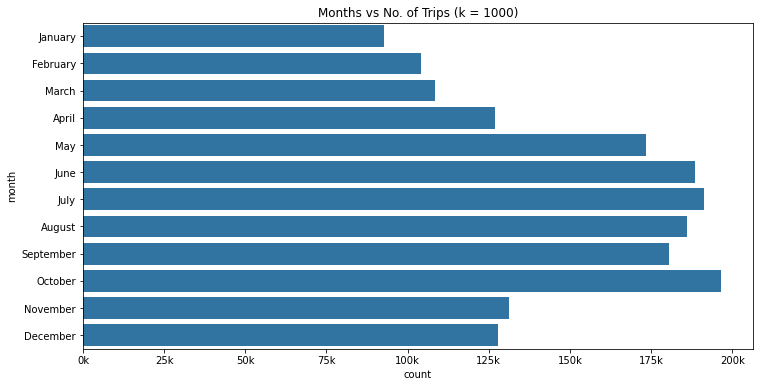

In [9]:
ticks = np.arange(0,200000+ 25000, 25000)
plt.figure(figsize = (12,6))
sb.countplot(data = bike , y = 'month', color = color)
plt.xticks( ticks , [str(int(i/1000))+'k' for i in ticks])
plt.title('Months vs No. of Trips (k = 1000)')
plt.show()

## Mean speed of riders was approximately 10km/hr.

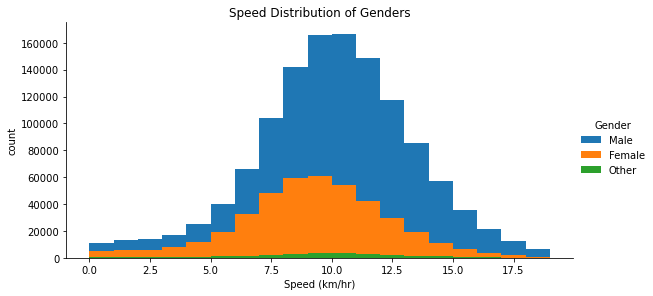

In [10]:
j = sb.FacetGrid(data = bike , hue = 'member_gender',height = 4 , aspect =2)
j.map(plt.hist , 'speed', bins = np.arange(0,20,1))
j.add_legend(title = 'Gender')
plt.ylabel('count')
plt.xlabel('Speed (km/hr)')
plt.title('Speed Distribution of Genders')
plt.show()

## The elderly took longer time to complete their journey.

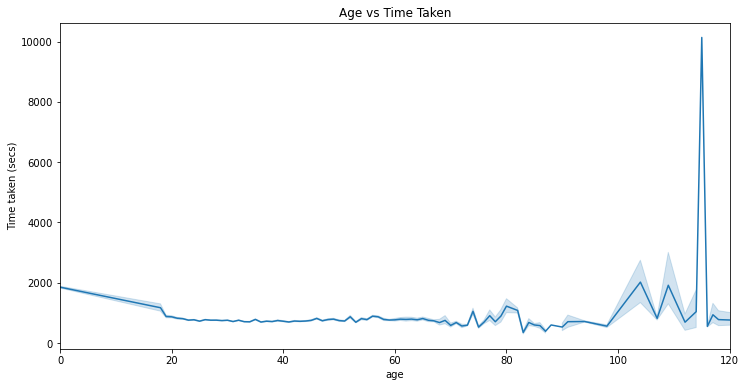

In [11]:
plt.figure(figsize = (12,6))
sb.lineplot(data =bike , x = 'age', y = 'duration_sec')
plt.xlim(0,120)
plt.title('Age vs Time Taken')
plt.ylabel('Time taken (secs)')
plt.show()

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
